In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt

In [168]:
class add_graph:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):  # 미분..
        dx = 1 * dout
        dy = 1 * dout
        return dx, dy

In [169]:
class mul_graph:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = self.y * dout
        dy = self.x * dout
        return dx, dy

In [170]:
class mse_graph:
    def __init__(self):
        self.loss = None
        self.y = None  # 예측모델
        self.t = None  # target 정답근사치모델?
        self.x = None  # 입력값
    def forward(self, y, t):
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0]
        return self.loss
    def backward(self, x, dout=1):
        data_size = self.t.shape[0]
        dweight_mse = ((self.y - self.t)*x).sum() * 2 / data_size  # mse를 a에 대해 미분한 값
        dbias_mse = (self.y - self.t).sum() * 2 / data_size  # 뭔데 이거..
        return dweight_mse, dbias_mse

In [171]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [172]:
mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [173]:
apple_price = mul_apple_graph.forward(apple, apple_num)
orange_price = mul_orange_graph.forward(orange, orange_num)
all_price = add_apple_orange_graph.forward(apple_price, orange_price)
total_price = mul_tax_graph.forward(all_price, tax)
print(total_price)

715.0000000000001


In [174]:
dprice = 1  # 맨 끝단에 줄 미분값 1..
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)
print('dApple :', dapple)
print('dApple_num :', dapple_num)
print('dOrange :', dorange)
print('dOrange_num :', dorange_num)

dApple : 2.2
dApple_num : 110.00000000000001
dOrange : 3.3000000000000003
dOrange_num : 165.0


In [175]:
def celsius_to_fahrenheit(x):
    return x*1.8 + 32

data_C = np.array(range(100))
data_F = celsius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100
scaled_data_F = data_F / 100
# 아까 스케일링 /100 작게 만든 이유.. 정답 찾으러 와리가리할때 발산하지말라고..

print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [176]:
weight = np.random.uniform(0, 5, 1)  # 0부터 5 사이의 값을 1개 뽑!
print(weight)
bias = 0  # 이거는 0으로......간다..Z
# 모델은 두개뿐.. weight=kernel, bias..

[1.84920561]


In [177]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [178]:
weighted_data = weight_graph.forward(weight, scaled_data_C)
predict_data = bias_graph.forward(weighted_data, bias)
print(predict_data)

[0.         0.01849206 0.03698411 0.05547617 0.07396822 0.09246028
 0.11095234 0.12944439 0.14793645 0.1664285  0.18492056 0.20341262
 0.22190467 0.24039673 0.25888879 0.27738084 0.2958729  0.31436495
 0.33285701 0.35134907 0.36984112 0.38833318 0.40682523 0.42531729
 0.44380935 0.4623014  0.48079346 0.49928551 0.51777757 0.53626963
 0.55476168 0.57325374 0.5917458  0.61023785 0.62872991 0.64722196
 0.66571402 0.68420608 0.70269813 0.72119019 0.73968224 0.7581743
 0.77666636 0.79515841 0.81365047 0.83214252 0.85063458 0.86912664
 0.88761869 0.90611075 0.92460281 0.94309486 0.96158692 0.98007897
 0.99857103 1.01706309 1.03555514 1.0540472  1.07253925 1.09103131
 1.10952337 1.12801542 1.14650748 1.16499953 1.18349159 1.20198365
 1.2204757  1.23896776 1.25745981 1.27595187 1.29444393 1.31293598
 1.33142804 1.3499201  1.36841215 1.38690421 1.40539626 1.42388832
 1.44238038 1.46087243 1.47936449 1.49785654 1.5163486  1.53484066
 1.55333271 1.57182477 1.59031682 1.60880888 1.62730094 1.64579

In [179]:
dout = 1
dbias, dbiased_data = bias_graph.backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
print(dbias)    # bias에 대한 미분값은 1개인데
print(dweight)  # weight에 대한 미분값은 100개네요 곤란합니다
# (왜 곤란한지도 잘 모르겠는데 지금은.. 일단 곤란하다니까 평균값으로 1개로 만들어준대..)

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [180]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

0.08760666110814769


In [181]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)

-0.28448667578542436
-0.591286445907675


In [182]:
learning_rate = 0.1  # 이거 왜 곱해줬었죠..? 알았는데요 모르겠습니다
# 아 이거 그거 좌우 와리가리 발산금지 표식같은 ㅋㅋㅋㅋ 그래서 0.01 정도로 하는..? 하다보면 지가 조절함 (?!)
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print('before learnig weight :', weight)
print('after learning weight :', learned_weight)

before learnig weight : [1.84920561]
after learning weight : [1.8632877]


In [183]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before learning bias :', bias)
print('after learning bias :', learned_bias)

before learning bias : 0
after learning bias : 0.0591286445907675


### 여기까지가 1 Epoch다~~~

스케일링하는 이유 러닝 돌리다보면 서로 곱하고 더하고 옘병하는데 그게 1보다 큰 수면 난리버거지되니까.. 서로 지지고볶고해도 숫자 대책없이 커지지말라고 스케일링한다?

In [184]:
# 애기 공부하께요~~~~
weight = np.random.uniform(0, 5, 1)
bias = 0
dout = 1
learning_rate = 0.1
error_list = []

for i in range(1000):
    #forward
    weighted_data = weight_graph.forward(weight, scaled_data_C)
    predict_data = bias_graph.forward(weighted_data, bias)
    #backward
    dout = 1
    dbias, dbiased_data = bias_graph.backward(dout)
    dweight, dscaled_data_C = weight_graph.backward(dbiased_data)
    #mse
    mse = mseGraph.forward(predict_data, scaled_data_F)
    error_list.append(mse)
    weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
    #learning
    weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
    bias = bias - learning_rate * bias_mse_gradient * dbias

print(weight)
print(bias)

[1.7994799]
0.3202672417558931


2.2971354189201314e-08


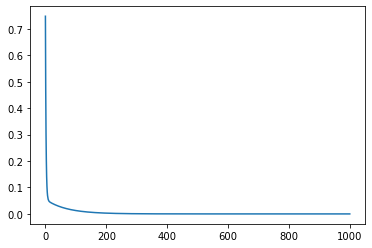

In [185]:
print(error_list[-1])

plt.plot(error_list)
plt.show()